# Homework 4: Can you predict the Midterm Elections?

Due: Monday, November 3, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW4.ipynb download=HW4.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work. For the competition (problem 4), we will post a link on Piazza to a Google Form for you to submit your predictions. 


---


## Introduction

**Add Introduction**

You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a final prediction of the result of each state.

#### Data

We will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

In [1]:
import numpy as np
import pandas as pd # pandas
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Data Wrangling

We will read in the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) and create a dictionary of DataFrames as well a master table information for each race.

#### Problem 1(a)

Read in [this JSON object](http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate) containing the polls for the 2014 Senate Elections using the HuffPost API. Call this JSON object `info`.  This JSON object is imported as a list in Python where each element contains the information for one race.  Use the function `type` to confirm the that `info` is a list. 

In [2]:
import json
import requests
from urllib.error import HTTPError

url_address ='http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate'
info = requests.get(url_address).json()
    
type(info)

list

### There are no estimates for RI state.

I will remove it.

In [3]:
info.remove(info[2])

#### Problem 1(b)

For each element of the list in `info` extract the state. We should have one poll per state, but we do not. Why?

**Hint**: Use the internet to find out information on the races in each state that has more than one entry. Eliminate entries of the list that represent races that are not happening.

In [4]:
states = []
for race in info:
    states.append(race['state'])
    
from collections import Counter

Counter(states)

Counter({'AK': 1,
         'AR': 1,
         'CO': 1,
         'DE': 1,
         'GA': 1,
         'HI': 1,
         'IA': 1,
         'ID': 1,
         'IL': 1,
         'KS': 1,
         'KY': 1,
         'LA': 1,
         'MA': 1,
         'ME': 1,
         'MI': 1,
         'MN': 1,
         'MS': 1,
         'MT': 1,
         'NC': 1,
         'NE': 1,
         'NH': 2,
         'NJ': 1,
         'NM': 1,
         'OK': 2,
         'OR': 1,
         'SC': 2,
         'SD': 1,
         'TN': 1,
         'TX': 1,
         'VA': 1,
         'WV': 1,
         'WY': 1})

**South Carolina**
United States Senate special election in **South Carolina**, 2014

The seat was formerly held by Republican Jim DeMint, who resigned on January 1, 2013. Nikki Haley, the Governor of South Carolina, announced the appointment of U.S. Representative Tim Scott to fill the seat. Scott ran in the special election and won by beating Democratic councilwoman Joyce Dickerson in the November general election. 

src:https://en.wikipedia.org/wiki/United_States_Senate_special_election_in_South_Carolina,_2014
There was a special election when Jim DeMint resigned.

**New Hampshire**
http://www.politico.com/story/2013/11/charlie-bass-jeanne-shaheen-new-hampshire-2014-099315
Charlie bass Resigned but I guess there was some polls with him.


In [5]:
titles_to_exclude = ['2014-new-hampshire-senate-bass-vs-shaheen', '2014-south-carolina-senate-scott-vs-dickerson']
print('b4: ', len(info))

for race in info:
    if race['slug'] in titles_to_exclude:
        info.remove(race)
        
print('after:', len(info))

b4:  35
after: 33


#### Problem 1(c)

Create a dictionary of pandas DataFrames called `polls` keyed by the name of the election (a string). Each value in the dictionary should contain the polls for one of the races.

In [599]:
import requests
polls = dict()
url_base = 'http://elections.huffingtonpost.com/pollster/'
JSON_EXTENSION = '.json'

for race in info:
    url = url_base + race['slug'] + JSON_EXTENSION
    d = json.loads(requests.get(url).text)
    polls[race['title']] = pd.DataFrame(d["polls"])

In [218]:
#version with dataframe instead of dict
import requests
url_base = 'http://elections.huffingtonpost.com/pollster/'
JSON_EXTENSION = '.json'

polls_df = pd.DataFrame()
for race in info:
    url = url_base + race['slug'] + JSON_EXTENSION
    d = json.loads(requests.get(url).text)
    df = pd.DataFrame(d["polls"])
    df['race'] = race['title']                
    polls_df = polls_df.append(df, ignore_index=True)

In [8]:
info_df = pd.DataFrame(info)
info_df.head(3)

,election_date,estimates,id,last_updated,poll_count,short_title,slug,state,title,topic,url
0,2014-11-04,"[{'choice': 'Coons', 'value': 56.0, 'lead_conf...",571,2016-06-06T14:37:54.000Z,5,2014 Delaware Senate: Wade vs. Coons,2014-delaware-senate-wade-vs-coons,DE,2014 Delaware Senate: Wade vs. Coons,2014-senate,http://elections.huffingtonpost.com/pollster/2...
1,2014-11-04,"[{'choice': 'Markey', 'value': 54.1, 'lead_con...",570,2016-06-06T14:37:55.000Z,13,2014 Massachusetts Senate: Herr vs. Markey,2014-massachusetts-senate-herr-vs-markey,MA,2014 Massachusetts Senate: Herr vs. Markey,2014-senate,http://elections.huffingtonpost.com/pollster/2...
2,2014-11-04,"[{'choice': 'Daines', 'value': 53.8, 'lead_con...",568,2016-06-06T14:37:56.000Z,7,2014 Montana Senate: Daines vs. Curtis,2014-montana-senate-daines-vs-curtis,MT,2014 Montana Senate: Daines vs. Curtis,2014-senate,http://elections.huffingtonpost.com/pollster/2...


#### Problem 1(d)

Now create a master table information containing information about each race. Create a pandas DataFrame called `candidates` with rows containing information about each race. The `candidates` DataFrame should have the following columns: 

1. `State` = the state where the race is being held
2. `R` = name of republican candidate
3. `D` = name of non-republican candidate (Democrate or Independent) 
4. `incumbent` = R, D or NA

**Hint**: You will need a considerable amount of data wrangling for this.

In [617]:
def get_candidates(row):
    series = pd.Series()
    series['state'] = row['state']
    series['id'] = row['id']
    for estimate in row['estimates']:
        party = estimate['party']
        candidate = estimate['choice']
        isIncubent = estimate['incumbent']
        prob = estimate['value'] 
            
        if('Rep' == party):
            series['R'] = candidate
            series['R_prob'] = prob
        if('Dem' == party):
            series['D'] = candidate
            series['D_prob'] = prob
        if not 'D' in series.keys():
            series['D'] = candidate
            series['D_prob'] = prob
        
        if (isIncubent):
            series['incumbent'] = party[:1]
    return series

candidates = info_df.apply(lambda row: get_candidates(row), axis=1)
candidates.head(3)

,D,D_prob,R,R_prob,id,incumbent,state
0,Coons,56.0,Wade,34.0,571,D,DE
1,Markey,54.1,Herr,33.4,570,D,MA
2,Curtis,36.1,Daines,53.8,568,NaN,MT


In [10]:
candidates.isnull().sum()

D            0
D_prob       0
R            0
R_prob       0
id           0
incumbent    8
state        0
dtype: int64

In [11]:
candidates[candidates.incumbent.isnull()]

,D,D_prob,R,R_prob,id,incumbent,state
2,Curtis,36.1,Daines,53.8,568,NaN,MT
3,Johnson,28.6,Lankford,62.4,567,NaN,OK
16,Weiland,29.7,Rounds,43.4,511,NaN,SD
17,Domina,30.3,Sasse,57.2,505,NaN,NE
18,Nunn,43.4,Perdue,47.4,497,NaN,GA
21,Braley,45.6,Ernst,48.1,463,NaN,IA
27,Tennant,35.8,Capito,53.5,418,NaN,WV
30,Peters,51.6,Land,39.8,407,NaN,MI


polls['2014 Alaska Senate: Sullivan vs. Begich']## Problem 2: Confidence Intervals

Compute a 99% confidence interval for each state. 

In [12]:
polls['2014 Alaska Senate: Sullivan vs. Begich'].head(2)

,affiliation,cell,choices,enddate,id,mode,numobs,partisan,pollster,population,releasedatetime,slug,startdate,url
0,Dem,no,"{'Begich': 45, 'Other': 4, 'Undecided': 5, 'Su...",2014-11-02,21302,IVR/Online,1052,Pollster,PPP (D),Likely Voters,2014-11-03T12:13:22Z,ppp-d-21302,2014-11-01,http://www.publicpolicypolling.com/pdf/2014/PP...
1,None,no,"{'Begich': 42, 'Other': 5, 'Undecided': 6, 'Su...",2014-10-30,21240,IVR/Online,887,Nonpartisan,Rasmussen,Likely Voters,2014-10-31T22:16:55Z,rasmussen-21240,2014-10-27,http://www.rasmussenreports.com/public_content...


#### Problem 2(a)

Assume you have $M$ polls with sample sizes $n_1, \dots, n_M$. If the polls are independent, what is the average of the variances of each poll if the true proportion is $p$?

** Your answer here: **

Variance of the Bernoulli trial
\begin{eqnarray*}
    var(x) = (1-p)p 
\end{eqnarray*}

Variance of the sample with size n:

\begin{eqnarray*}
    Var(x_i) = \frac {(1-p)p } {n_i}
\end{eqnarray*}

\begin{eqnarray*}
 f(x) =  \frac {\sum_{m=0}^{M} Var(x_m)} {M}
\end{eqnarray*}

\begin{eqnarray*}
    \frac{1}{M} \sum_{i=1}^M Var( {X}_i) = \frac{1}{M} p(1-p)(1/n_1 + \dots +1/n_M)
\end{eqnarray*}

#### Problem 2(b)

Compute the square root of these values in Problem 2(a) for the republican candidates in each race. Then, compute the standard deviations of the observed poll results for each race. 

In [13]:
def form_candidates_prob_df(polls_df):
    choices = pd.DataFrame()
    for num, choice in polls_df.choices.iteritems():
        series = pd.Series(choice)
        series = series / 100
        series['numobs'] = polls_df.loc[num].numobs
        choices = choices.append(series, ignore_index=True)
    choices.fillna(0.0, inplace=True)
    return choices

def calculate_average_of_variances(poll_prob_df, candidate):
    # [0] is to get only the value, not series
    prob_mean = poll_prob_df[candidate].mean()[0]
    n_mean = poll_prob_df.numobs.mean()
#     M = poll_prob_df[candidate].count()[0]
    return prob_mean*(1-prob_mean) / n_mean

def calculate_observed_polls_std(poll_prob_df, candidate):
    return poll_prob_df[candidate].std()[0]

def get_candidate_to_consider(candidates_to_consider, poll_prob_df):
    return [col for col in list(poll_prob_df.columns) if col in candidates_to_consider]

In [85]:
from dateutil.relativedelta import relativedelta

def get_recent_polls(polls_df, months_to_substract_count):
    polls_df.enddate = pd.to_datetime(polls_df.enddate)
    df = polls_df
    if months_to_substract_count != 0:
        date = polls_df.enddate.max() - relativedelta(months = months_to_substract_count)
        df = polls_df[polls_df.enddate >= date]
    return df

def calcucate_polls_for_rep_candidates(months_to_substract=0):
    rep_candidates = list(candidates['R'])
    polls_variaces_average = []
    polls_observed_std = []
    polls_count = []
    race_name = []
    for poll in polls:
        recent_polls = get_recent_polls(polls[poll], months_to_substract)
        poll_prob_df = form_candidates_prob_df(recent_polls)
        candidate = get_candidate_to_consider(rep_candidates, poll_prob_df)
        polls_variaces_average.append(calculate_average_of_variances(poll_prob_df, candidate))
        polls_observed_std.append(calculate_observed_polls_std(poll_prob_df, candidate))
        polls_count.append(poll_prob_df.shape[0])
        polls_teo_std = np.sqrt(polls_variaces_average)
        race_name.append(poll)
    df = pd.DataFrame(data=[polls_teo_std, polls_observed_std, polls_count, race_name]).T
    df.columns = ['teo_std', 'obs_std', 'polls_count', 'race']
    df.polls_count = df.polls_count.astype('int')
    return df

### Compute the square root of these values in Problem 2(a) for the republican candidates in each race. 

#### Problem 2(c) 

Plot observed versus theoretical (average of the theoretical SDs) with the area of the point proportional to number of polls. How do these compare?

** Your answer here: **

In [86]:
all_polls = calcucate_polls_for_rep_candidates()
all_polls.head(2)

,teo_std,obs_std,polls_count,race
0,0.0187397,0.0452769,5,2014 Delaware Senate: Wade vs. Coons
1,0.0156519,0.0258199,13,2014 Massachusetts Senate: Herr vs. Markey


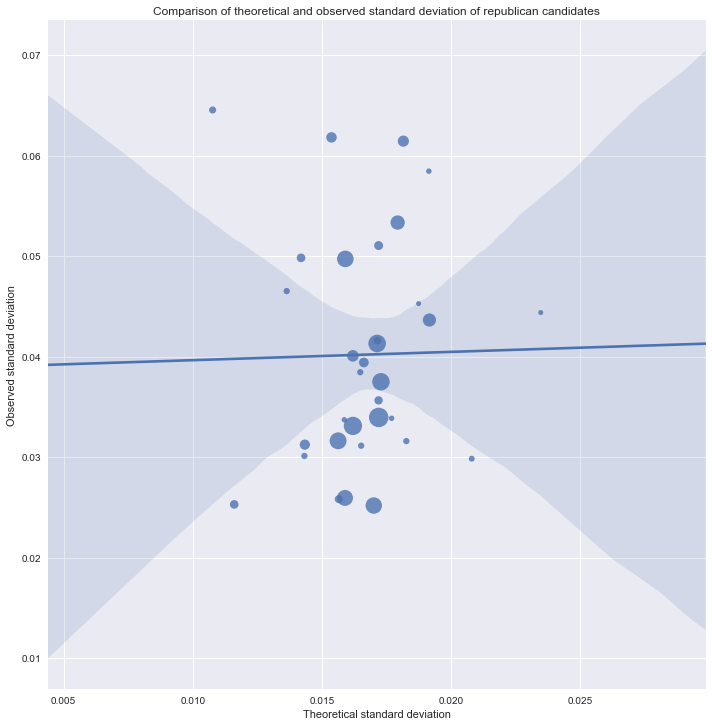

In [54]:
marker_size = all_polls.polls_count*5
sns.lmplot(data= all_polls, x='teo_std', y='obs_std', scatter_kws={"s": marker_size}, size=10)
plt.title('Comparison of theoretical and observed standard deviation of republican candidates')
plt.xlabel('Theoretical standard deviation')
plt.ylabel('Observed standard deviation')
plt.show()

Observed std are much higher than theoretical ones.

#### Problem 2(d)

Repeat Problem 2(c) but include only the most recent polls from the last two months. Do they match better or worse or the same? Can we just trust the theoretical values?

In [87]:
recent_polls = calcucate_polls_for_rep_candidates(2)
recent_polls.tail(3)

,teo_std,obs_std,polls_count,race
30,0.0155076,0.0301511,33,2014 Michigan Senate: Land vs. Peters
31,0.016091,0.0264127,20,2014 Arkansas Senate: Cotton vs. Pryor
32,0.0160817,0.0312648,22,2014 Kentucky Senate: McConnell vs. Grimes


In [ ]:
all_polls['recent_polls_calculations'] = 0
recent_polls['recent_polls_calculations'] = 1
df = all_polls.append(recent_polls, ignore_index=True)
df.head(2)

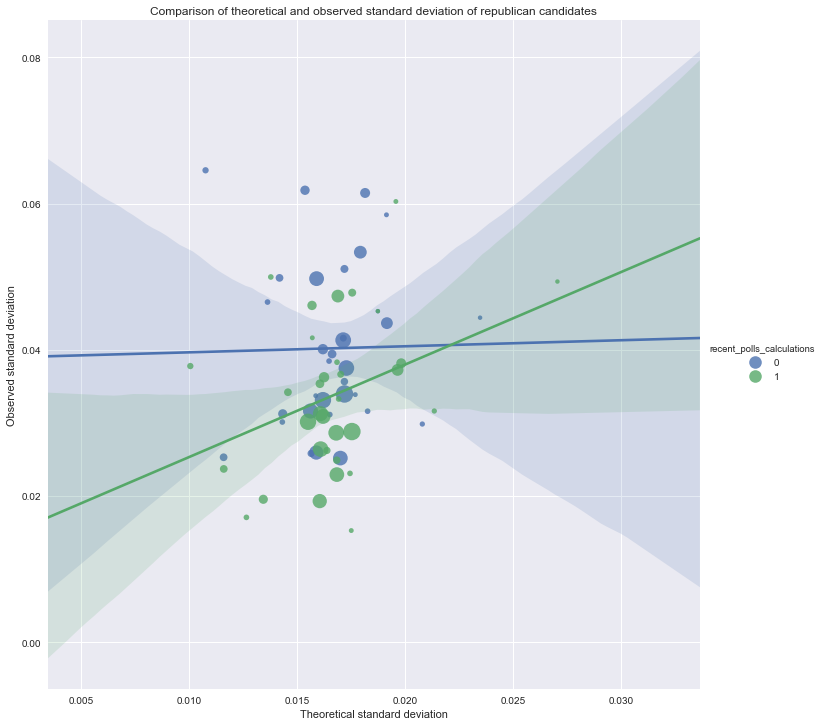

In [73]:
marker_size = df.polls_count*4
sns.lmplot(data= df, x='teo_std', y='obs_std', scatter_kws={"s": marker_size}, size=10, hue='recent_polls_calculations')
plt.title('Comparison of theoretical and observed standard deviation of republican candidates')
plt.xlabel('Theoretical standard deviation')
plt.ylabel('Observed standard deviation')

# Do they (most recent polls from the last two months) match better or worse or the same? Can we just trust the theoretical values?

** Your answer here: **

We can't trust theoretical values. There is a visible distinction between recent polls and all polls data.
Recent polls observed standard deviation decreases, it is also higher in almost all cases when compared to theoretical one.

In [79]:
del all_polls['recent_polls_calculations']
del recent_polls['recent_polls_calculations']

#### Problem 2(e)

Create a scatter plot with each point representing one state. Is there one or more races that are outlier in that it they have much larger variabilities than expected ? Explore the original poll data and explain why the discrepancy?

I did manually check if state from candidates df fits race by comparing name of the race to republical candidate.

In [535]:
races_teo_diff = all_polls.copy()

races_teo_diff = all_polls[['teo_std', 'obs_std', 'race']].copy()
races_teo_diff['state'] = candidates.state
races_teo_diff['R'] = candidates.R
races_teo_diff['obs_teo_diff'] = races_teo_diff.obs_std - races_teo_diff.teo_std

races_teo_diff.obs_teo_diff = races_teo_diff.obs_teo_diff.astype('float')
races_teo_diff.sort_values(by='obs_teo_diff', inplace=True)
races_teo_diff.reset_index(inplace=True)
del races_teo_diff['index']
races_teo_diff.head(2)

,teo_std,obs_std,race,state,R,obs_teo_diff
0,0.0170047,0.0251842,2014 Colorado Senate: Gardner vs. Udall,CO,Gardner,0.008179
1,0.020796,0.0298408,2014 Montana Senate: Daines vs. Curtis,MT,Daines,0.009045


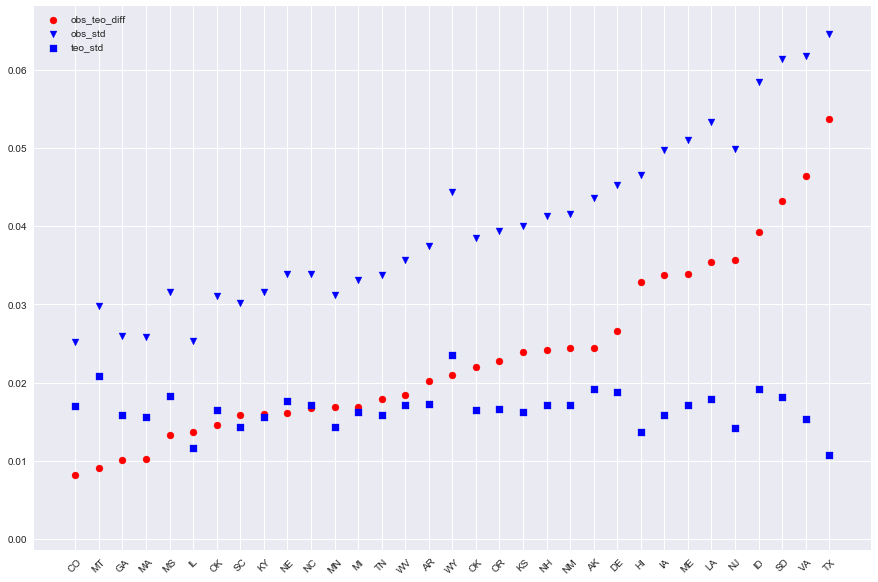

In [536]:
#fancy colors!
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
df = races_teo_diff
plt.figure(figsize=(15,10))

plt.scatter(x=df.index, y=df.obs_teo_diff, color='red')
plt.scatter(x=df.index, y=df.obs_std, color='blue', marker='v')
plt.scatter(x=df.index, y=df.teo_std, color='blue', marker='s')

my_x_ticks = list(df.state)
plt.xticks(df.index, my_x_ticks, rotation=45)

plt.legend()

Is there one or more races that are outlier in that it they have much larger variabilities than expected ? 

'HI', 'IA', 'ME', 'LA', 'NJ', 'ID', 'SD', 'VA', 'TX' are states in witch there is a visible distinction between observed and teoretical std.

Explore the original poll data and explain why the discrepancy?

In [208]:
outlier_state_names = ['HI', 'IA', 'ME', 'LA', 'NJ', 'ID', 'SD', 'VA', 'TX']
outlier_states = info_df[info_df.state.isin(outlier_state_names)]
outlier_states

,election_date,estimates,id,last_updated,poll_count,short_title,slug,state,title,topic,url
4,2014-11-04,"[{'choice': 'Schatz', 'value': 67.9, 'lead_con...",566,2016-06-06T14:37:57.000Z,8,2014 Hawaii Senate,2014-hawaii-senate-cavasso-vs-schatz,HI,2014 Hawaii Senate: Cavasso vs. Schatz,2014-senate,http://elections.huffingtonpost.com/pollster/2...
8,2014-11-04,"[{'choice': 'Risch', 'value': 57.7, 'lead_conf...",543,2016-06-06T14:38:11.000Z,6,2014 Idaho Senate,2014-idaho-senate-risch-vs-mitchell,ID,2014 Idaho Senate: Risch vs. Mitchell,2014-senate,http://elections.huffingtonpost.com/pollster/2...
9,2014-11-04,"[{'choice': 'Booker', 'value': 52.7, 'lead_con...",538,2016-06-06T14:38:14.000Z,15,2014 New Jersey Senate,2014-new-jersey-senate-bell-vs-booker,NJ,2014 New Jersey Senate: Bell vs. Booker,2014-senate,http://elections.huffingtonpost.com/pollster/2...
13,2014-11-04,"[{'choice': 'Cornyn', 'value': 54.0, 'lead_con...",528,2016-06-06T14:38:20.000Z,10,2014 Texas Senate,2014-texas-senate-cornyn-vs-alameel,TX,2014 Texas Senate: Cornyn vs. Alameel,2014-senate,http://elections.huffingtonpost.com/pollster/2...
15,2014-11-04,"[{'choice': 'Collins', 'value': 61.1, 'lead_co...",522,2016-06-06T14:38:23.000Z,16,2014 Maine Senate,2014-maine-senate-collins-vs-bellows,ME,2014 Maine Senate: Collins vs. Bellows,2014-senate,http://elections.huffingtonpost.com/pollster/2...
16,2014-11-04,"[{'choice': 'Rounds', 'value': 43.4, 'lead_con...",511,2016-06-06T14:38:28.000Z,25,2014 South Dakota Senate,2014-south-dakota-senate-rounds-vs-weiland,SD,2014 South Dakota Senate: Rounds vs. Weiland,2014-senate,http://elections.huffingtonpost.com/pollster/2...
21,2014-11-04,"[{'choice': 'Ernst', 'value': 48.1, 'lead_conf...",463,2016-07-08T16:29:30.000Z,55,2014 Iowa Senate,2014-iowa-senate-ernst-vs-braley,IA,2014 Iowa Senate: Ernst vs. Braley,2014-senate,http://elections.huffingtonpost.com/pollster/2...
25,2014-11-04,"[{'choice': 'Warner', 'value': 50.3, 'lead_con...",444,2016-06-06T14:39:10.000Z,22,2014 Virginia Senate,2014-virginia-senate-gillespie-vs-warner,VA,2014 Virginia Senate: Gillespie vs. Warner,2014-senate,http://elections.huffingtonpost.com/pollster/2...
29,2014-12-06,"[{'choice': 'Cassidy', 'value': 55.5, 'lead_co...",411,2016-06-06T14:39:31.000Z,41,2014 Louisiana Senate,2014-louisiana-senate-cassidy-vs-landrieu,LA,2014 Louisiana Senate: Cassidy vs. Landrieu,2014-senate,http://elections.huffingtonpost.com/pollster/2...


In [600]:
for poll in polls:
    poll_df = polls[poll]
    df = pd.DataFrame()
    for choice in poll_df.choices:
        df = df.append(pd.Series(choice), ignore_index=True)

    df.fillna(0.0, inplace=True)
    polls[poll] = poll_df.merge(df, left_index=True, right_index=True)
#     del polls[poll]['choices']

In [438]:
def print_outlier_race_summary(race_title):
    val = polls[race_title]
    columns = val.iloc[:,-4:].columns
    print(val.groupby('pollster')[columns].mean().head())
    print()

    candidates = list(val.iloc[:,-4:].columns)
    candidates.remove('Other')
    candidates.remove('Undecided')
    
    pollsters = val.groupby('pollster')[columns].mean() - val.iloc[:,-4:].mean()
    print('Sorted by: ' + candidates[0])
    print(pollsters.sort_values(by=columns[0], ascending=False).head())
    print()
    print('Sorted by: ' + candidates[1])
    print(pollsters.sort_values(by=columns[1], ascending=False).head())

    pollsters.plot(kind='bar')
    pollsters.describe().plot(kind='box')

                                 Alameel  Cornyn  Other  Undecided
pollster                                                          
CBS/NYT/YouGov                      35.5    55.5    2.0        7.0
PPP (D)                             32.0    49.0    0.0       20.0
Rasmussen                           29.0    48.5    6.0       17.0
Texas Lyceum                        30.0    48.0    8.0       14.0
YouGov/U of Texas/Texas Tribune     28.0    46.5    6.5       13.0

Sorted by: Alameel
                                 Alameel  Cornyn  Other  Undecided
pollster                                                          
CBS/NYT/YouGov                       3.7     4.6   -2.1       -5.2
PPP (D)                              0.2    -1.9   -4.1        7.8
Texas Lyceum                        -1.8    -2.9    3.9        1.8
Rasmussen                           -2.8    -2.4    1.9        4.8
YouGov/U of Texas/Texas Tribune     -3.8    -4.4    2.4        0.8

Sorted by: Cornyn
                       

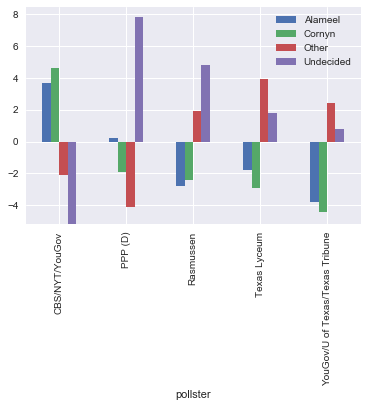

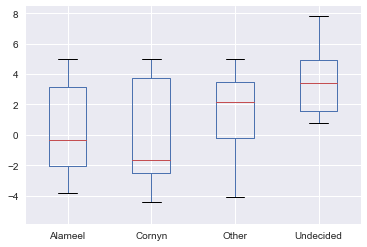

In [439]:
print_outlier_race_summary('2014 Texas Senate: Cornyn vs. Alameel')

                Mitchell  Other  Risch  Undecided
pollster                                         
CBS/NYT/YouGov     28.25   0.25  62.25        9.0
PPP (D)            32.00   0.00  50.00       18.0
Rasmussen          29.00   6.00  54.00       11.0

Sorted by: Mitchell
                Mitchell     Other     Risch  Undecided
pollster                                               
PPP (D)             3.00 -1.166667 -8.833333   7.166667
Rasmussen           0.00  4.833333 -4.833333   0.166667
CBS/NYT/YouGov     -0.75 -0.916667  3.416667  -1.833333

Sorted by: Risch
                Mitchell     Other     Risch  Undecided
pollster                                               
Rasmussen           0.00  4.833333 -4.833333   0.166667
CBS/NYT/YouGov     -0.75 -0.916667  3.416667  -1.833333
PPP (D)             3.00 -1.166667 -8.833333   7.166667


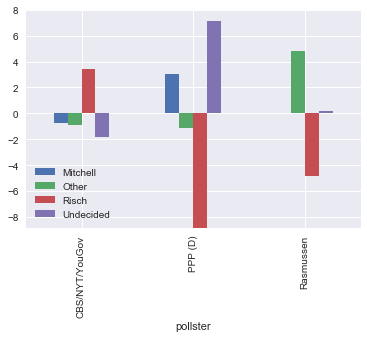

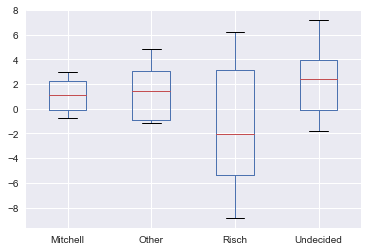

In [440]:
print_outlier_race_summary('2014 Idaho Senate: Risch vs. Mitchell')

                                  Gardner  Other  Udall  Undecided
pollster                                                          
Benenson (D-Project New America)    44.00    1.0   47.0        7.0
CBS/NYT/YouGov                      45.25    1.5   48.0        5.5
CNN                                 50.00    0.0   46.0        0.0
FOX                                 43.00    7.0   37.0       12.0
Fabrizio (R-Chamber of Commerce)    44.00    7.0   42.0        0.0

Sorted by: Gardner
                                                 Gardner     Other     Udall  \
pollster                                                                       
CNN                                             5.185185 -3.296296  1.740741   
Monmouth University                             2.185185  0.703704  1.740741   
Gravis Marketing                                2.185185  2.037037 -2.592593   
Magellan (R-National Mining Association)        2.185185 -3.296296  0.740741   
PPP (D-Americans for Tax Fairne

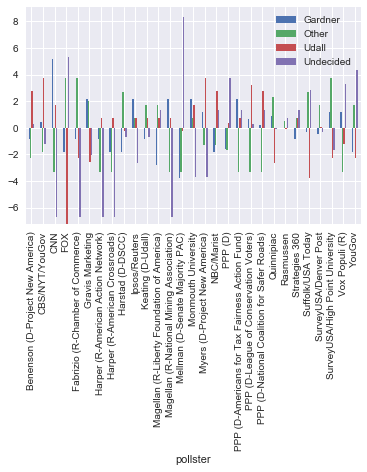

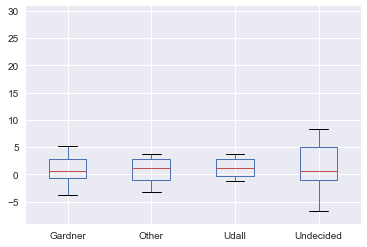

In [447]:
print_outlier_race_summary('2014 Colorado Senate: Gardner vs. Udall')

My choice was Texas because of observed - theoretical difference was highest. This variability may be caused by high values of undecided and other.  

On example of 2014 Idaho Senate: Risch vs. Mitchell we can see that some pollsters might favorize one of the candidates and this causes error growth.

If it comes to 2014 Colorado Senate: Gardner vs. Udall example it shows that there is a significat ammount of pollsters, so we can come to conclusion that even if some of them favorize some candidates mean value will be more accurate. 

Conclusion is that variance is lower for races with more polls data.


#### Problem 2(f)

Construct confidence intervals for the difference in each race. Use either theoretical or data driven estimates of the standard error depending on your answer to this question. Use the results in Problem 2(e), to justify your choice.


In [544]:
polls['2014 Colorado Senate: Gardner vs. Udall']

,affiliation,cell,enddate,id,mode,numobs,partisan,pollster,population,releasedatetime,slug,startdate,url,Gardner,Other,Udall,Undecided
0,Dem,no,2014-11-02,21303,IVR/Online,739,Sponsor,PPP (D),Likely Voters,2014-11-03T12:17:21Z,ppp-d-21303,2014-11-01,http://www.publicpolicypolling.com/pdf/2014/PP...,48.0,3.0,45.0,3.0
1,None,no,2014-11-02,21309,Live Phone,815,Nonpartisan,Quinnipiac,Likely Voters,2014-11-03T13:50:32Z,quinnipiac-21309,2014-10-28,http://www.quinnipiac.edu/news-and-events/quin...,45.0,7.0,43.0,4.0
2,None,no,2014-10-31,21243,Internet,1417,Nonpartisan,YouGov,Likely Voters,2014-11-01T11:09:31Z,yougov-21243,2014-10-25,http://cdn.yougov.com/cumulus_uploads/document...,43.0,5.0,42.0,11.0
3,None,no,2014-10-29,21214,IVR/Online,618,Nonpartisan,SurveyUSA/Denver Post,Likely Voters,2014-10-30T23:29:31Z,surveyusa-denver-post-21214,2014-10-27,http://extras.mnginteractive.com/live/media/si...,46.0,5.0,44.0,5.0
4,Dem,no,2014-10-29,21205,Automated Phone,573,Sponsor,PPP (D-League of Conservation Voters),Likely Voters,2014-10-30T20:02:03Z,ppp-d-league-of-conservation-voters-21205,2014-10-28,http://www.lcv.org/assets/pdf/co-senate-poll-1...,48.0,0.0,48.0,4.0
5,Rep,no,2014-10-27,21207,IVR/Online,642,Pollster,Vox Populi (R),Likely Voters,2014-10-30T20:49:20Z,vox-populi-r-21207,2014-10-26,http://www.poppolling.com/useruploads/files/co...,46.0,0.0,43.0,10.0
6,None,no,2014-10-27,21187,Live Phone,844,Nonpartisan,Quinnipiac,Likely Voters,2014-10-30T12:12:13Z,quinnipiac-21187,2014-10-22,http://www.quinnipiac.edu/news-and-events/quin...,46.0,8.0,39.0,7.0
7,None,no,2014-10-25,21178,Live Phone,760,Nonpartisan,Strategies 360,Likely Voters,2014-10-29T16:13:37Z,strategies-360-21178,2014-10-20,http://big.assets.huffingtonpost.com/S360COSta...,44.0,4.0,45.0,8.0
8,Dem,yes,2014-10-23,21028,Live Phone,1005,Sponsor,Keating (D-Udall),Likely Voters,2014-10-24T21:33:31Z,keating-d-udall-21028,2014-10-21,http://images.politico.com/global/2014/10/24/f...,44.0,5.0,45.0,6.0
9,None,no,2014-10-23,21110,Automated Phone,966,Nonpartisan,Rasmussen,Likely Voters,2014-10-27T16:51:57Z,rasmussen-21110,2014-10-21,http://www.rasmussenreports.com/public_content...,51.0,2.0,45.0,2.0


In [568]:
from scipy import stats
import scipy as sp

data = polls['2014 Colorado Senate: Gardner vs. Udall']
data = data.Gardner - data.Udall
conf = 0.99

var = np.var(data)
std = np.sqrt(var)
mean = np.mean(data)

confidence_interval = stats.norm.interval(conf, loc=mean,scale=std)
print(confidence_interval)

# z_critical = stats.norm.ppf(q = conf)
# margin_of_error = z_critical * (std/math.sqrt(sample_size))
# confidence_interval = (sample_mean - margin_of_error,
#                        sample_mean + margin_of_error)

(-9.1795631083217444, 10.290674219432855)

In [579]:
race_polls

,affiliation,cell,enddate,id,mode,numobs,partisan,pollster,population,releasedatetime,slug,startdate,url,Grimes,McConnell,Other,Undecided
0,Dem,no,2014-11-01,21257,IVR/Online,1503,Pollster,PPP (D),Likely Voters,2014-11-02T01:44:58Z,ppp-d-21257,2014-10-30,http://www.publicpolicypolling.com/pdf/2014/PP...,42.0,50.0,3.0,0.0
1,None,no,2014-10-30,21263,Live Phone,556,Nonpartisan,NBC/Marist,Likely Voters,2014-11-02T14:37:22Z,nbc-marist-21263,2014-10-27,http://newscms.nbcnews.com/sites/newscms/files...,41.0,50.0,0.0,3.0
2,None,no,2014-10-29,21215,IVR/Online,597,Nonpartisan,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,Likely Voters,2014-10-30T23:33:59Z,surveyusa-courier-journal-herald-leader-whas-w...,2014-10-25,http://www.surveyusa.com/client/PollReport.asp...,43.0,48.0,3.0,6.0
3,Rep,yes,2014-10-27,21208,Live Phone,600,Sponsor,POS (R-Crossroads GPS),Likely Voters,2014-10-30T20:56:18Z,pos-r-crossroads-gps-21208,2014-10-25,https://www.crossroadsgps.org/wp-content/uploa...,43.0,50.0,4.0,0.0
4,None,no,2014-10-23,21051,Internet,1502,Nonpartisan,CBS/NYT/YouGov,Likely Voters,2014-10-26T15:00:07Z,cbs-nyt-yougov-21051,2014-10-16,https://today.yougov.com/news/2014/09/07/battl...,39.0,45.0,2.0,14.0
5,Rep,no,2014-10-21,20980,Live Phone,815,Sponsor,VCR (R-McConnell),Likely Voters,2014-10-22T20:51:03Z,vcr-r-mcconnell-20980,2014-10-16,http://big.assets.huffingtonpost.com/VCRMcConn...,41.0,49.0,3.0,7.0
6,None,no,2014-10-19,20947,Live Phone,557,Nonpartisan,Western Kentucky University,Likely Voters,2014-10-21T11:18:33Z,western-kentucky-university-20947,2014-10-16,http://wkussrc.blogspot.com/2014/10/2014-big-r...,42.0,45.0,5.0,8.0
7,None,no,2014-10-19,20946,IVR/Online,655,Nonpartisan,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,Likely Voters,2014-10-20T22:11:55Z,surveyusa-courier-journal-herald-leader-whas-w...,2014-10-15,http://www.surveyusa.com/client/PollReport.asp...,43.0,44.0,5.0,8.0
8,None,no,2014-10-16,20916,Automated Phone,1000,Nonpartisan,Rasmussen,Likely Voters,2014-10-17T16:57:36Z,rasmussen-20916,2014-10-15,http://www.rasmussenreports.com/public_content...,44.0,52.0,2.0,3.0
9,Rep,no,2014-10-12,20929,Automated Phone,1020,Sponsor,Gravis/Human Events (R),Likely Voters,2014-10-20T01:55:53Z,gravis-human-events-r-20929,2014-10-11,http://gravismarketing.com/polling-and-market-...,47.0,50.0,0.0,4.0


In [614]:
polls['2014 South Dakota Senate: Rounds vs. Weiland']

,affiliation,cell,enddate,id,mode,numobs,partisan,pollster,population,releasedatetime,slug,startdate,url,Other,Pressler,Rounds,Undecided,Weiland
0,None,no,2014-10-27,21138,Live Phone,429,Nonpartisan,Monmouth University,Likely Voters,2014-10-28T16:38:20Z,monmouth-university-21138,2014-10-24,http://www.monmouth.edu/assets/0/32212254770/3...,1.0,19.0,45.0,4.0,31.0
1,None,no,2014-10-26,21175,Automated Phone,908,Nonpartisan,Rasmussen,Likely Voters,2014-10-29T15:55:03Z,rasmussen-21175,2014-10-22,http://www.rasmussenreports.com/public_content...,0.0,21.0,45.0,3.0,31.0
2,None,no,2014-10-26,21186,IVR/Online,611,Nonpartisan,SurveyUSA/KOTA/KSFY/Aberdeen American News,Likely Voters,2014-10-30T11:51:11Z,surveyusa-kota-ksfy-aberdeen-american-news-21186,2014-10-21,http://www.surveyusa.com/client/PollReport.asp...,2.0,19.0,43.0,4.0,32.0
3,None,no,2014-10-23,21108,Live Phone,800,Nonpartisan,Mason-Dixon/Argus Leader/KELO-TV,Likely Voters,2014-10-27T16:07:55Z,mason-dixon-argus-leader-kelo-tv-21108,2014-10-20,http://www.argusleader.com/story/davidmontgome...,2.0,13.0,42.0,10.0,33.0
4,None,no,2014-10-23,21035,Live Phone,730,Nonpartisan,NBC/Marist,Likely Voters,2014-10-26T13:35:59Z,nbc-marist-21035,2014-10-19,http://www.nbcnews.com/politics/first-read/nbc...,3.0,16.0,43.0,7.0,29.0
5,None,no,2014-10-23,21042,Internet,527,Nonpartisan,CBS/NYT/YouGov,Likely Voters,2014-10-26T14:44:39Z,cbs-nyt-yougov-21042,2014-10-16,https://today.yougov.com/news/2014/09/07/battl...,0.0,17.0,38.0,21.0,25.0
6,Rep,no,2014-10-20,21007,Live Phone,500,Sponsor,POS (R-Rounds/NRSC),Likely Voters,2014-10-24T01:07:26Z,pos-r-rounds-nrsc-21007,2014-10-18,http://images.politico.com/global/2014/10/22/s...,3.0,16.0,48.0,9.0,24.0
7,Rep,no,2014-10-11,20832,Automated Phone,630,Pollster,Harper (R),Likely Voters,2014-10-13T19:50:42Z,harper-r-20832,2014-10-09,http://harperpolling.com/docs/default-source/d...,5.0,23.0,37.0,2.0,33.0
8,None,no,2014-10-05,20758,IVR/Online,616,Nonpartisan,SurveyUSA/KOTA/KSFY/Aberdeen American News,Likely Voters,2014-10-08T11:42:08Z,surveyusa-kota-ksfy-aberdeen-american-news-20758,2014-10-01,http://www.surveyusa.com/client/PollReport.asp...,3.0,32.0,35.0,2.0,28.0
9,None,no,2014-10-01,20719,Internet,382,Nonpartisan,CBS/NYT/YouGov,Likely Voters,2014-10-05T16:10:13Z,cbs-nyt-yougov-20719,2014-09-20,https://today.yougov.com/news/2014/09/07/battl...,1.0,12.0,42.0,17.0,27.0


In [613]:
est = info_df[info_df.title == '2014 South Dakota Senate: Rounds vs. Weiland'].estimates
for a in est:
    print(a)
    print()

[{'choice': 'Rounds', 'value': 43.4, 'lead_confidence': 99.9, 'first_name': 'Mike', 'last_name': 'Rounds', 'party': 'Rep', 'incumbent': False}, {'choice': 'Weiland', 'value': 29.7, 'lead_confidence': 0.0, 'first_name': 'Rick', 'last_name': 'Weiland', 'party': 'Dem', 'incumbent': False}, {'choice': 'Pressler', 'value': 17.7, 'lead_confidence': None, 'first_name': 'Larry', 'last_name': 'Pressler', 'party': 'Ind', 'incumbent': False}, {'choice': 'Other', 'value': 1.65, 'lead_confidence': None, 'first_name': None, 'last_name': None, 'party': 'N/A', 'incumbent': False}]



In [772]:
def get_candidate(columns, possible_candidates):
    return [cand for cand in columns if cand in possible_candidates][0]

def get_conf_interval(data, conf):
    var = np.var(data)
    std = np.sqrt(var)
    mean = np.mean(data)
    return stats.norm.interval(conf, loc=mean,scale=std)

dem_candidates = list(candidates.D)
rep_candidates = list(candidates.R)
CONF = 0.99

race_names = []
conf_intervals = []
means = []

for poll_name, race_polls in polls.items():
    columns =  race_polls.iloc[:,-5:].columns
    rep_cand = get_candidate(columns, rep_candidates)
    dem_cand = get_candidate(columns, dem_candidates)
    data = race_polls[rep_cand] - race_polls[dem_cand]
    race_names.append(poll_name)
    conf_intervals.extend([get_conf_interval(data, CONF)])
    means.append(np.mean(data))

In [804]:
df = pd.DataFrame()
df['means'] = means
df['top_interval'] = [x[0] for x in conf_intervals]
df['bottom_interval'] = [x[1] for x in conf_intervals]
df['race'] = race_names
df

,means,top_interval,bottom_interval,race
0,-17.400000,-65.643659,-15.106341,2014 Delaware Senate: Wade vs. Coons
1,-22.461538,-32.795294,-12.127783,2014 Massachusetts Senate: Herr vs. Markey
2,17.142857,-28.032904,-6.767096,2014 Montana Senate: Daines vs. Curtis
3,31.125000,-24.184417,-3.282250,2014 Oklahoma Senate: Lankford vs. Johnson
4,-40.375000,-22.608433,-2.191567,2014 Hawaii Senate: Cavasso vs. Schatz
5,1.407407,-19.754351,-1.864697,2014 Kansas Senate
6,44.800000,-27.309526,-1.857141,2014 Wyoming Senate: Enzi vs. Hardy
7,19.000000,-32.179004,1.269913,2014 Tennessee Senate: Alexander vs. Ball
8,29.833333,-29.884192,3.252613,2014 Idaho Senate: Risch vs. Mitchell
9,-13.733333,-17.148841,6.374648,2014 New Jersey Senate: Bell vs. Booker


In [809]:
df = df.sort_values(by='means')
df.head()

,means,top_interval,bottom_interval,race
4,-40.375000,-22.608433,-2.191567,2014 Hawaii Senate: Cavasso vs. Schatz
1,-22.461538,-32.795294,-12.127783,2014 Massachusetts Senate: Herr vs. Markey
0,-17.400000,-65.643659,-15.106341,2014 Delaware Senate: Wade vs. Coons
25,-15.454545,-0.962751,29.105608,2014 Virginia Senate: Gillespie vs. Warner
10,-14.583333,-12.756632,7.598737,2014 New Mexico Senate: Weh vs. Udall


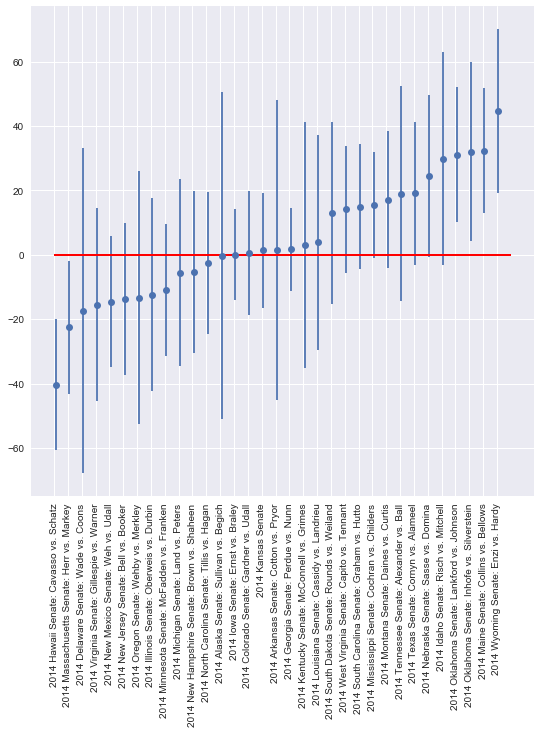

In [824]:
plt.figure(figsize=(9,9))

size = df.shape[0]
plt.errorbar(x=np.arange(0.1, size, 1), 
             y=df.means, 
             yerr=df.top_interval-df.bottom_interval,
             fmt='o')
plt.xticks(range(size), df.race.values, rotation=90)

plt.hlines(xmin=0, xmax=size,
           y=0, 
           linewidth=2.0,
           color="red")

# Problem 3: Prediction and Posterior Probabilities

Perform a Bayesian analysis to predict the probability of Republicans winning in each state then provide a posterior distribution of the number of republicans in the senate.

#### Problem 3(a)

First, we define a Bayesian model for each race. The prior for the difference $\theta$ between republicans and democtrats will be $N(\mu,\tau^2)$. Say before seeing poll data you have no idea who is going to win, what should $\mu$ be? How about $\tau$, should it be large or small? 

** Your answer here: **

#### Problem 3(b)

What is the distribution of $d$ conditioned on $\theta$. What is the posterior distribution of $\theta | d$? 

**Hint**: Use normal approximation. 

**Your answer here:**

#### Problem 3(c)

The prior represents what we think before hand. We do not know who is expected to win, so we assume $\mu=0$. For this problem estimate $\tau$ using the observed differences across states (Hint: $\tau$ represents the standard deviation of a typical difference). Compute the posterior mean for each state and plot it against original average. Is there much change? Why or why not? 

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(d)

For each state, report a probabilty of Republicans winning. How does your answer here compare to the other aggregators?

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(e)

Use the posterior distributions in a Monte Carlo simulation to generate election results. In each simulation compute the total number of seats the Republican control. Show a histogram of these results.

In [ ]:
### Your code here ###

## Problem 4

Predict the results for the 2014 Midterm Elections. We will have a three competitions with the terms for scoring entries described above. For both questions below, **explain** or provide commentary on how you arrived at your predictions including code. 

**Hint**: Use election results from 2010, 2012 to build and test models.

#### Problem 4(a)

Predict the number of Republican senators. You may provide an interval. Smallest interval that includes the election day result wins. 

**Note**: we want the total so add the numbers of those that are not up for election.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(b)

Predict the R-D difference in each state. The predictions that minimize the residual sum of squares between predicted and observed differences wins.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(c)

Report a confidence interval for the R-D difference in each state. If the election day result falls outside your confidence interval in more than two states you are eliminated. For those surviving this cutoff, we will add up the size of all confidence intervals and sum. The smallest total length of confidence interval wins. 

**Note**: you can use Bayesian credible intervals or whatever else you want. 

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
